<a href="https://colab.research.google.com/github/Kaendill/Enigine-cooling-system/blob/main/engine_cooling_system_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Engine Cooling System Simulation & Analysis**

This project simulates and analyzes the behavior of a vehicle's **engine cooling system** over a 3-hour driving session exploring different driving conditions. It aims to explore how different variables such as engine speed, RPM, coolant temperature, fan operation, and heat transfer interact to regulate engine temperature. This simulation is especially relevant for **thermodynamics-focused diagnostics** and performance optimization.

---

###  **Key Dataset Columns & Their Roles**

| Column Name                       | Description                                              | Relation to System                                     |
| --------------------------------- | -------------------------------------------------------- | ------------------------------------------------------ |
| **Time**                          | Timestamp recorded every minute                          | Provides time base for trend analysis                  |
| **Engine\_speed**                 | Vehicle speed in km/h                                    | Affects engine load and heat generation                |
| **Engine\_rpm**                   | Engine revolutions per minute                            | Proportional to heat generation and coolant flow rate  |
| **Engine\_temp**                  | Temperature of the engine (°C)                           | Core variable regulated by cooling system              |
| **Coolant\_inlet\_temp**          | Coolant temp entering the engine                         | Used to absorb heat from engine                        |
| **Coolant\_outlet\_temp**         | Coolant temp exiting the engine (headed to radiator)     | Shows amount of heat absorbed from engine              |
| **Ambient\_Temp**                 | Outside air temperature (°C)                             | Affects cooling efficiency (esp. radiator fan cooling) |
| **Radiator\_fan**                 | Status of the radiator fan: ON or OFF                    | Activates when engine overheats to increase cooling    |
| **Flow\_rate**                    | Coolant flow rate (L/min or m³/s), based on RPM          | Influences cooling efficiency                          |
| **Heat\_absorbed** *(calculated)* | Heat transferred from engine to coolant using `Q = mcΔT` | Key metric for Coolant effectiveness                   |

---

###  **How They Relate in the Cooling System**

1. **RPM & Speed** → Increase engine work → Generate more heat → Raise **Engine\_temp**
2. Rising **Engine\_temp** triggers the **Radiator\_fan** when it exceeds a set threshold.
3. **Coolant\_inlet\_temp** absorbs engine heat and exits as **Coolant\_outlet\_temp**
4. The **difference** between inlet and outlet coolant temps is used to compute **Heat\_absorbed**.
5. Higher **Flow\_rate** improves heat removal, especially when assisted by the **Radiator\_fan**.
6. **Ambient\_Temp** affects how well the radiator and fan dissipate heat to the environment.


## Data Simulation

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import random
import math
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
random.seed(420)

In [ ]:
time_steps = pd.date_range(start = '2025-04-16 09:00', periods= 180, freq= '1min') # 3 hours of driving with data recorded every minute.

In [ ]:
# starting values
engine_temp = 80
fan_status = False
ambient_temp = 30
ambient_change_rate = 0.5
hose_diameter = 0.025 #25mm
hose_radius = hose_diameter / 2
area = math.pi * (hose_radius ** 2)
Data = []

In [ ]:
# simulation of temperature, flow and fan
for minutes, time in enumerate(time_steps, start=1):
  speed = random.randint(20,100) #L/min
  rpm = random.randint(800, 4000)

  coolant_velocity = (rpm * 0.0005) + random.uniform(-0.1, 0.1) # 0.0005 is a scaling factor used for the simulation, the random is for noise, more realism.

  coolant_velocity = max(0.5, min(coolant_velocity, 3))
  flow_rate_m3s = area * coolant_velocity
  flow_rate_Lmin = round(flow_rate_m3s * 1000 * 60, 2)

  if engine_temp > 95:
    fan_status = True,
  elif engine_temp < 88:
    fan_status = False

  if fan_status:
    cooling_effect = (engine_temp - ambient_temp) * 0.02 # sensitivity factor

    temp_change = -random.uniform(0.1, 0.3) * cooling_effect / 2 # negative because of cooling
  else:
    temp_change = random.uniform(0.2, 0.6) # Heating

  engine_temp += temp_change
  engine_temp = round(engine_temp, 2)

  inlet_temp = round((engine_temp - random.uniform(3, 6)), 2)
  outlet_temp = round((engine_temp - random.uniform(0.5, 2)), 2)

  if minutes % 30 == 0:
    ambient_temp += ambient_change_rate

  Data.append({
      "Time": time,
      "Engine_speed": speed,
      "Engine_rpm": rpm,
      "Engine_temp": engine_temp,
      'Coolant_inlet_temp': inlet_temp,
      "Coolant_outlet_temp": outlet_temp,
      "Radiator_fan": "ON" if fan_status else "OFF",
      "Ambient_Temp": ambient_temp,
      "Flow_rate" : flow_rate_Lmin
  })



# EDA

In [ ]:
df= pd.DataFrame(Data)

In [ ]:
df.shape

(180, 9)

In [ ]:
df.head(10)

,Time,Engine_speed,Engine_rpm,Engine_temp,Coolant_inlet_temp,Coolant_outlet_temp,Radiator_fan,Ambient_Temp,Flow_rate
0,2025-04-16 09:00:00,23,3557,80.31,77.02,78.81,OFF,30.0,54.04
1,2025-04-16 09:01:00,34,923,80.70,75.75,79.05,OFF,30.0,14.73
2,2025-04-16 09:02:00,99,1322,81.29,77.49,79.45,OFF,30.0,19.74
3,2025-04-16 09:03:00,63,1913,81.76,75.83,80.52,OFF,30.0,30.10
4,2025-04-16 09:04:00,81,3533,82.16,77.98,80.74,OFF,30.0,49.68
5,2025-04-16 09:05:00,30,2915,82.36,77.70,80.43,OFF,30.0,40.17
6,2025-04-16 09:06:00,84,1657,82.68,78.10,80.97,OFF,30.0,24.88
7,2025-04-16 09:07:00,35,2523,82.89,77.00,81.03,OFF,30.0,38.37
8,2025-04-16 09:08:00,86,1569,83.28,79.66,82.12,OFF,30.0,22.48
9,2025-04-16 09:09:00,36,989,83.66,80.10,81.70,OFF,30.0,15.32


In [ ]:
df.describe()

,Time,Engine_speed,Engine_rpm,Engine_temp,Coolant_inlet_temp,Coolant_outlet_temp,Ambient_Temp,Flow_rate
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,2025-04-16 10:29:30,62.477778,2412.622222,90.646722,86.201778,89.347167,31.266667,35.601556
min,2025-04-16 09:00:00,20.000000,807.000000,80.310000,75.750000,78.810000,30.000000,14.730000
25%,2025-04-16 09:44:45,39.750000,1619.250000,88.965000,84.385000,87.707500,30.500000,24.185000
50%,2025-04-16 10:29:30,64.000000,2358.500000,90.875000,86.805000,89.750000,31.500000,35.420000
75%,2025-04-16 11:14:15,84.000000,3172.500000,93.135000,88.620000,91.905000,32.000000,46.140000
max,2025-04-16 11:59:00,100.000000,3998.000000,95.470000,91.870000,94.440000,33.000000,59.500000
std,NaN,23.896765,938.913006,3.191351,3.340076,3.268616,0.861011,13.549620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 180 non-null    datetime64[ns]
 1   Engine_speed         180 non-null    int64         
 2   Engine_rpm           180 non-null    int64         
 3   Engine_temp          180 non-null    float64       
 4   Coolant_inlet_temp   180 non-null    float64       
 5   Coolant_outlet_temp  180 non-null    float64       
 6   Radiator_fan         180 non-null    object        
 7   Ambient_Temp         180 non-null    float64       
 8   Flow_rate            180 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 12.8+ KB


In [ ]:
df.sample(10)

,Time,Engine_speed,Engine_rpm,Engine_temp,Coolant_inlet_temp,Coolant_outlet_temp,Radiator_fan,Ambient_Temp,Flow_rate
98,2025-04-16 10:38:00,95,2031,88.19,82.45,87.32,ON,31.5,32.19
63,2025-04-16 10:03:00,49,2621,92.45,87.71,91.40,ON,31.0,39.64
88,2025-04-16 10:28:00,86,3891,89.30,85.00,88.06,ON,31.0,56.31
148,2025-04-16 11:28:00,100,926,91.45,87.20,90.82,ON,32.0,14.73
143,2025-04-16 11:23:00,47,2655,92.12,88.32,91.43,ON,32.0,39.03
93,2025-04-16 10:33:00,50,3466,88.66,84.39,87.89,ON,31.5,50.79
52,2025-04-16 09:52:00,59,3362,93.80,90.69,92.82,ON,30.5,46.58
100,2025-04-16 10:40:00,36,1250,87.92,83.05,86.83,ON,31.5,16.74
57,2025-04-16 09:57:00,68,1104,93.28,88.06,92.69,ON,30.5,16.62
43,2025-04-16 09:43:00,41,3894,95.01,90.18,93.92,ON,30.5,54.64


## Time Series Analysis

### 1. Variation of Engine Temperature with Time

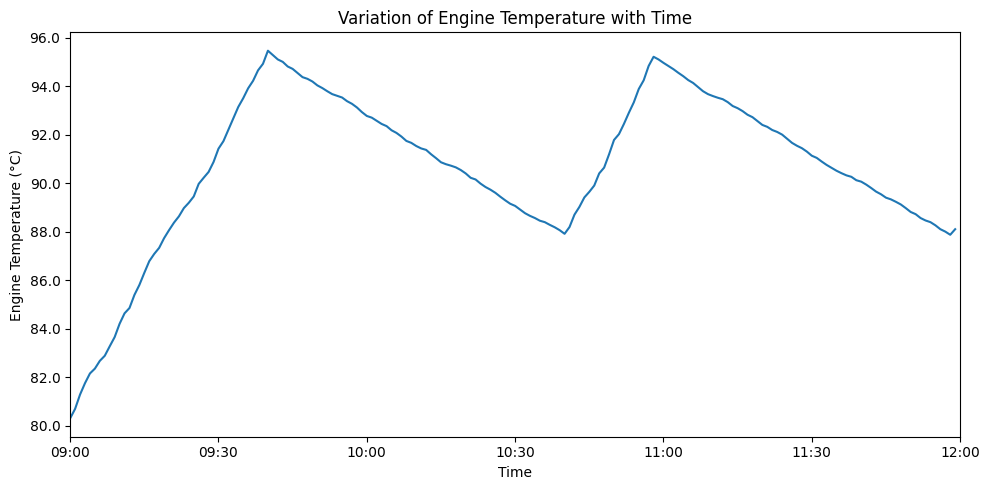

In [ ]:
# Engine temperature with time
df["Time"] = pd.to_datetime(df["Time"])
plt.figure(figsize=(10,5))
sns.lineplot(df, x= "Time", y= "Engine_temp")

# to set 30 minutes interval on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# to ensure start and end time is 09:00 and 12:00 respectively
start = datetime.strptime("2025-04-16 09:00:00", "%Y-%m-%d %H:%M:%S")
end = datetime.strptime("2025-04-16 12:00:00", "%Y-%m-%d %H:%M:%S")
plt.xlim(start, end)

# format the y-axis as one decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))

plt.xlabel("Time")
plt.ylabel("Engine Temperature (°C)")
plt.title('Variation of Engine Temperature with Time')
plt.tight_layout()
plt.show()

#### **Insight**:
The above line graph shows how the Engine temperature varies with differnt driving conditions per time. The temperature accelerates, peaks then decelerates again. This pattern is reapeated again. This might indicate high speed or high RPM which in turns leads to the heat generation.

### 2. How Engine Speed And RPM varies with Time

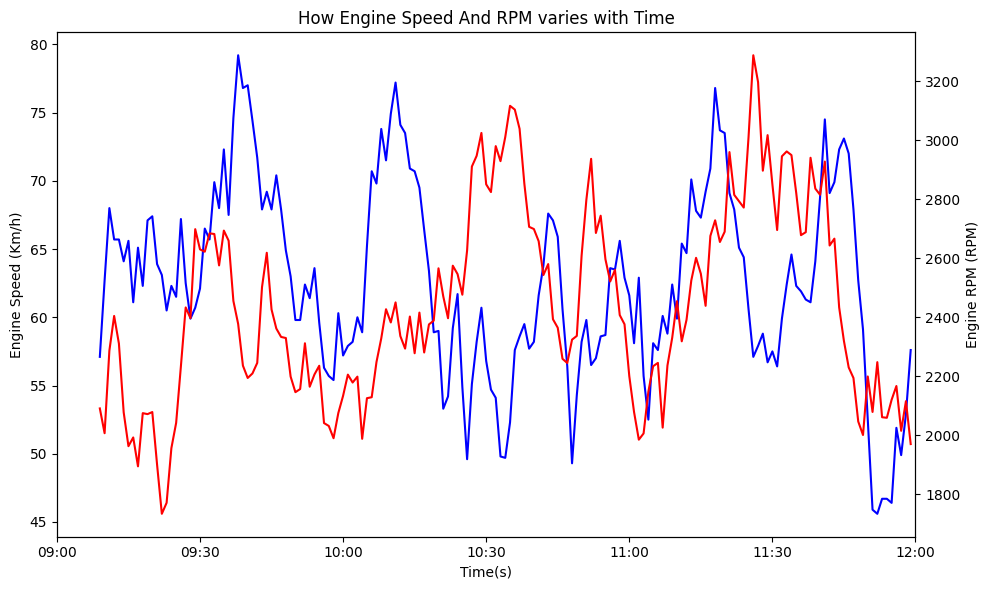

In [ ]:
# Engine RPM and Speed over time
# plotting a combo chart
# Using Rolling averages to reduce data points and smoothen the data.

df["smooth_speed"] = df['Engine_speed'].rolling(window=10).mean()
df["smooth_rpm"] = df['Engine_rpm'].rolling(window=10).mean()

fig, ax1= plt.subplots(figsize=(10,6))

ax1.plot(df["Time"], df["smooth_speed"], color= "blue", label= "Engine Speed")
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Engine Speed (Km/h)")
ax1.tick_params(axis= "y")

ax2= ax1.twinx()
ax2.plot(df["Time"], df["smooth_rpm"], color= "red", label= "Engine RPM")
ax2.set_ylabel("Engine RPM (RPM)")
ax2.tick_params(axis= "y")

# to set 30 minutes interval on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# to ensure start and end time is 09:00 and 12:00 respectively
start = datetime.strptime("2025-04-16 09:00:00", "%Y-%m-%d %H:%M:%S")
end = datetime.strptime("2025-04-16 12:00:00", "%Y-%m-%d %H:%M:%S")
plt.xlim(start, end)

plt.title("How Engine Speed And RPM varies with Time", fontsize= 12)
plt.tight_layout()
plt.show()

#### **Insight**:
The above combo chart consisting of two heart-beat-like line graph shows how the Engine speed and RPM both varies with time, according to different driving conditions. At first glance, the graphs may appear erratic or alternating, but a closer look reveals meaningful patterns—particularly how RPM and speed often rise or fall together, reflecting real-time driving behavior.. Between 11:00 and 11:30, for example shows that as the speed increases, RPM increases likewise, this might indicate acceleration phase or deceleration phase as seen at 11:30 to 11:59.


### 3. How Inlet And Outlet Coolant Temperatures Varies With Time

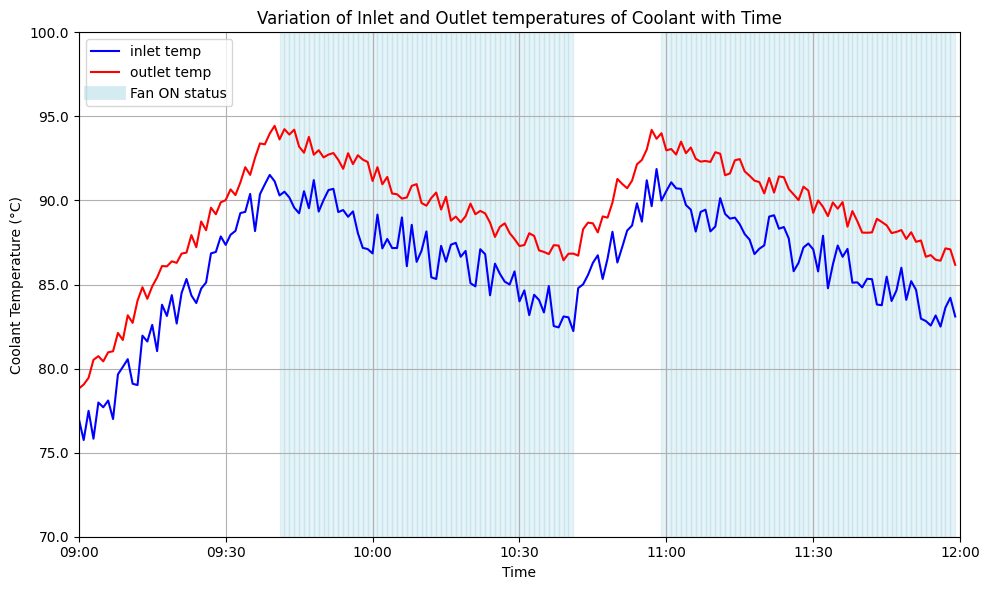

In [ ]:
# Variation of coolant inlet temp and outlet temp over time

plt.figure(figsize=(10, 6))
plt.plot(df["Time"], df['Coolant_inlet_temp'], label= "inlet temp", color= "Blue")
plt.plot(df["Time"], df['Coolant_outlet_temp'], label= "outlet temp", color= "Red")
plt.plot([], [], alpha= 0.5, color= "lightblue", linewidth= 10, label= "Fan ON status")


# Shade where fan is ON
for i in range(len(df)-1):
    if df["Radiator_fan"].iloc[i] == "ON":
        plt.axvspan(df["Time"].iloc[i], df["Time"].iloc[i+1], color='lightblue', alpha=0.3)

# to set 30 minutes interval on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# to ensure start and end time is 09:00 and 12:00 respectively
start = datetime.strptime("2025-04-16 09:00:00", "%Y-%m-%d %H:%M:%S")
end = datetime.strptime("2025-04-16 12:00:00", "%Y-%m-%d %H:%M:%S")
plt.xlim(start, end)

# format the y-axis to one decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))

plt.xlabel("Time")
plt.ylabel("Coolant Temperature (°C)")
plt.ylim(70,100)
plt.grid(True)
plt.title("Variation of Inlet and Outlet temperatures of Coolant with Time")
plt.legend()
plt.tight_layout()
plt.show()


#### **Insights**

The combo chart above illustrates how coolant temperatures—both inlet and outlet—change over time, with blue highlights marking periods when the radiator fan is active.

It can be observed that when the coolant temperature rises and reaches a certain peak, the radiator fan automatically switches ON to enhance cooling. As the coolant temperature drops due to this increased heat dissipation, the fan switches OFF. This cycle repeats throughout the drive.

This automatic fan activation likely occurs because, at lower vehicle speeds, natural airflow through the radiator is insufficient for effective cooling. Hence, the fan compensates when cooling demand exceeds passive airflow.

This dynamic reveals the interaction between coolant behavior and engine heat regulation, which is further explored in the next analysis section.


### 4. Correlation between Coolant temp and Engine Temp.

In [ ]:
df['coolant_delta'] = df['Coolant_outlet_temp'] - df['Coolant_inlet_temp']
Correlation= round(df['coolant_delta'].corr(df['Engine_temp']),2)
print('Correlation Coefficient:', Correlation)

Correlation Coefficient: 0.02


#### **Insights**
A correlation coefficient of 0.02, which is very close to zero, indicates a very weak linear relationship between Engine Temperature and Coolant Temperature. This suggests that increases in engine temperature do not consistently lead to proportional increases in coolant temperature.

One possible explanation is that the coolant absorbs heat up to a saturation point, and regulation mechanisms like the radiator fan and coolant flow rate actively control coolant temperature (as seen in the preceeding plot), weakening the correlation.

This behavior is better understood when visualized in a scatter plot, which can help reveal non-linear or phase-shifted trends between the two temperatures.

### 5. Variation of Coolant Temperature with Engine Temperature

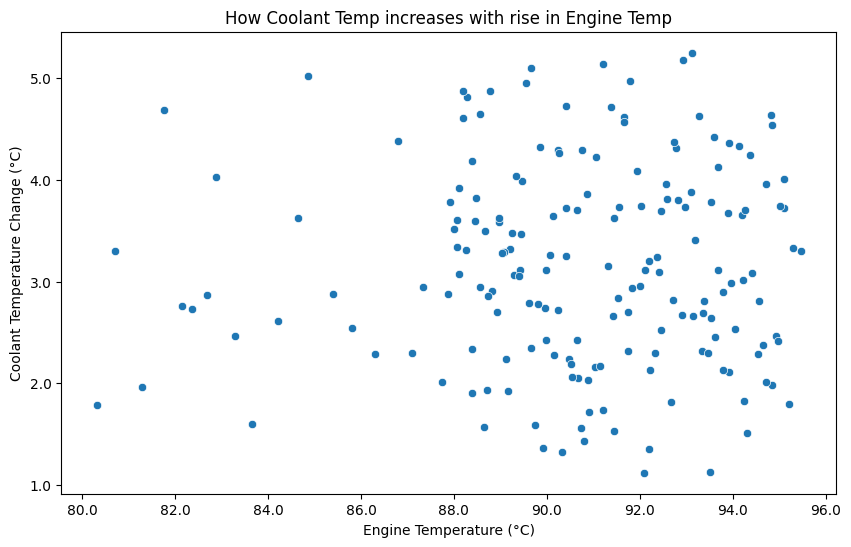

In [ ]:
# plot the visual
plt.figure(figsize=(10,6))
sns.scatterplot(x='Engine_temp', y='coolant_delta', data=df)
# format the y-axis as one decimal place
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))
# format the x-axis as one decimal place
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))
plt.xlabel('Engine Temperature (°C)')
plt.ylabel('Coolant Temperature Change (°C)')
plt.title('How Coolant Temp increases with rise in Engine Temp')
plt.show()

#### **Insights**
The cluster of data points on the right side of the plot provides a clearer view of the relationship between engine temperature and coolant temperature.

It shows that as the engine temperature increases, there is a corresponding rise in coolant temperature.

This trend suggests that the coolant absorbs more heat from the engine at higher operating temperatures, validating its role in thermal regulation within the engine cooling system.

### 6. Quantifying Heat Absorption Over Time

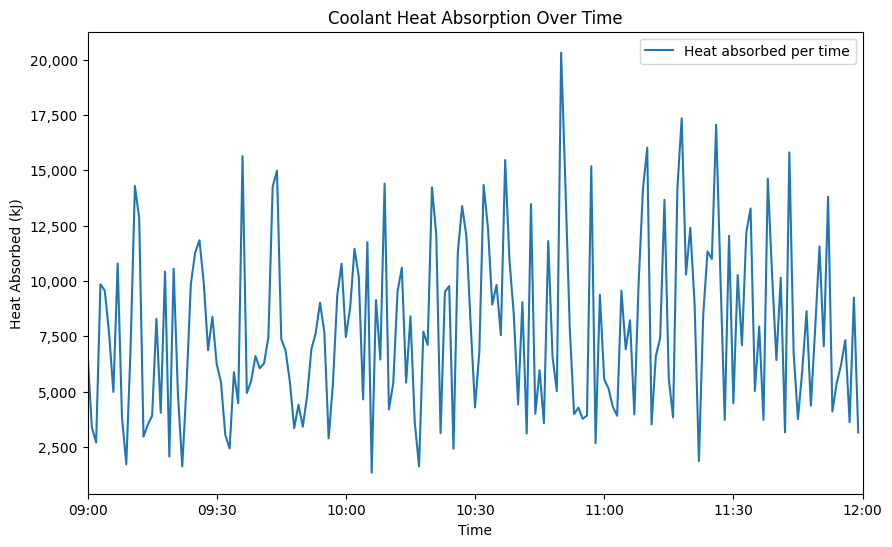

In [ ]:
'''
Quantifying heat absorbed by coolant from the Engine:
Q = M.C.T2-T1
M= Mass flow rate in kg/s, so volumetric flow rate L/min would be converted by dividing by 1000 and multiply by density/ 60

C= is the specific heat capacity of the working fluid ~ 4186# J/kg·°C for water

T2-T1 is the temp diff of the coolant at exit and entry of the engine, respectively.

'''
df['flow_kg_s'] = (df['Flow_rate']/ 1000) * 1000/ 60
df['heat_absorbed'] = df['flow_kg_s'] * 4186 * df['coolant_delta']

plt.figure(figsize=(10,6))
plt.plot(df['Time'],df['heat_absorbed'], label= 'Heat absorbed per time')

# to set 30 minutes interval on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# to ensure start and end time is 09:00 and 12:00 respectively
start = datetime.strptime("2025-04-16 09:00:00", "%Y-%m-%d %H:%M:%S")
end = datetime.strptime("2025-04-16 12:00:00", "%Y-%m-%d %H:%M:%S")
plt.xlim(start, end)

#Formatting the y-axis
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xlabel('Time')
plt.ylabel('Heat Absorbed (kJ)')
plt.title('Coolant Heat Absorption Over Time')
plt.legend()
plt.show()

#### **Insights**
The line graph above illustrates the amount of heat absorbed by the coolant over time during the driving session, measured in kilojoules (kJ).

This plot helps visualize how engine activity and cooling demand change throughout the journey. Peaks in the graph represent moments when the engine generated more heat, prompting the coolant to absorb and carry away larger quantities of thermal energy.

The fluctuations highlight periods of increased engine load, such as acceleration or uphill driving.

### 7. Heat Absorbed vs. Engine Temperature (with Fan Status)

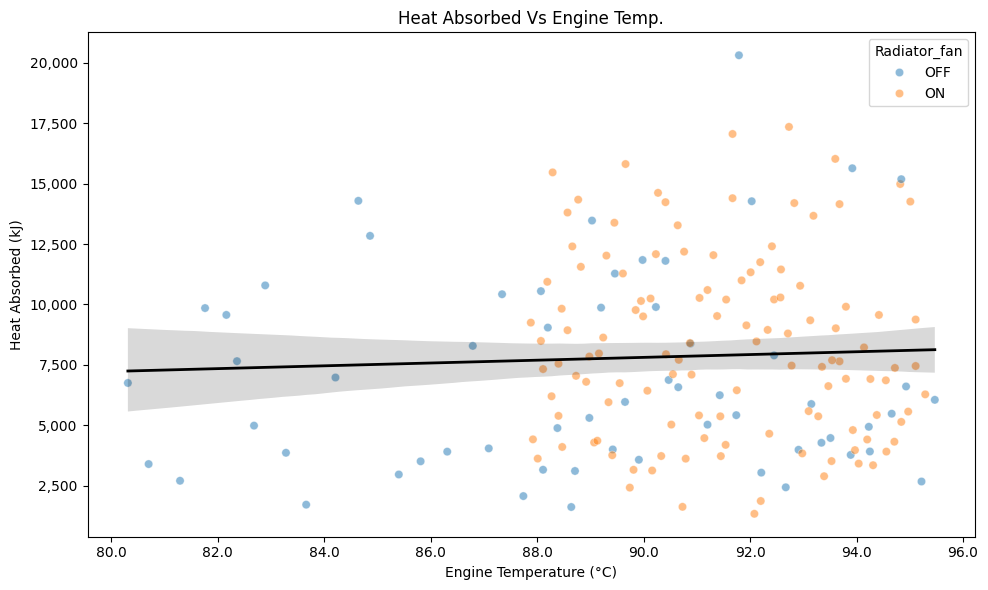

In [ ]:
'''
Relationship between Heat Absorbed and Engine Temperature
A scatterplot to show this relationship
'''
plt.figure(figsize=(10,6))

sns.scatterplot(data= df, x='Engine_temp', y='heat_absorbed', hue= 'Radiator_fan', alpha= 0.5)

sns.regplot(x='Engine_temp', y='heat_absorbed',data=df, scatter= False, color= 'black', line_kws={'linewidth': 2, 'label': 'Trendline'})

#formatting the y-axis
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# format the x-axis as one decimal place
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))

plt.xlabel('Engine Temperature (°C)')
plt.ylabel('Heat Absorbed (kJ)')
plt.title('Heat Absorbed Vs Engine Temp.')
plt.tight_layout()
plt.show()

#### **Insights**
The scatter plot illustrates the relationship between engine temperature and the heat absorbed by the coolant, while also showing when the radiator fan was ON (yellow) or OFF (blue).

1. Between 80°C and 88°C, we observe mostly blue points, indicating that the
radiator fan remained OFF, suggesting that the cooling system was managing heat without active fan support.

2. Beyond 88°C, the appearance of yellow points (fan ON) alongside blue suggests that the cooling load increased, prompting the fan to activate. This may reflect coolant saturation or higher heat generation, requiring additional cooling.

The cluster of points at higher engine temperatures shows how the system responds dynamically to regulate thermal conditions.

The trend line shows the general direction of the relationship. Points below the line represent instances where less heat was absorbed than expected at a given engine temperature—possibly due to temporary inefficiencies or low flow rate. Conversely, points above the line reflect more effective heat removal at similar temperatures.

### 8. Thermal Efficiency vs. Engine Temperature

In [ ]:
'''
System Efficiency == Thermal Effectiveness of the Coolant

Efficiency= actual heat absorbed / ideal heat absorbed
          = actual heat absorbed / max heat absorbed

hA= actual heat absorbed
hI= ideal heat absorbed
'''
df['hA']= df['heat_absorbed']
df['hI']=  df['flow_kg_s'] * 4186 * (df['Engine_temp'] - df['Coolant_inlet_temp'])
df['efficiency']= df['hA'] / df['hI']

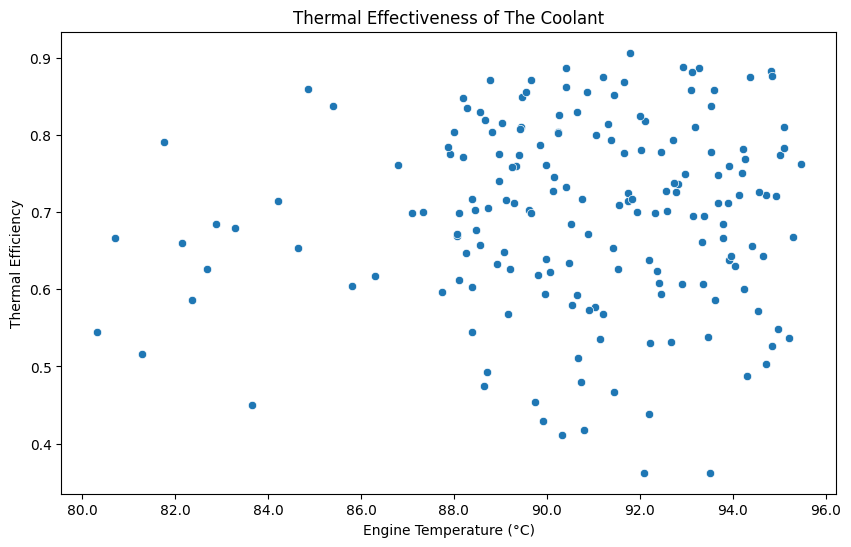

In [ ]:
# plotting...
plt.figure(figsize=(10,6))
sns.scatterplot(y='efficiency', x= 'Engine_temp', data=df)

# format the x-axis as one decimal place
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'{x:.1f}'))

plt.ylabel('Thermal Efficiency')
plt.xlabel('Engine Temperature (°C)')
plt.title('Thermal Effectiveness of The Coolant')
plt.show()

#### **Insights**
The thermal efficiency of the cooling system is calculated as:

Efficiency
=
Actual Heat Absorbed/
Maximum Possible Heat Absorbed

This plot displays thermal efficiency against engine temperature to explore their relationship.

A cluster of points in the top-right corner of the plot shows that higher efficiencies are often associated with higher engine temperatures.

This pattern may suggest that as the engine heats up, the cooling system responds effectively by absorbing more heat, indicating a well-performing coolant and an efficient heat transfer system.

The presence of high efficiency at elevated temperatures could also imply that the coolant is not saturated, maintaining good thermal performance even under stress.

This correlation gives valuable insight into the adaptability and responsiveness of the cooling system during demanding engine conditions.



##  Conclusion

This project simulated and analyzed the performance of a vehicle’s engine cooling system using time-series data over a 3-hour driving session. By examining key variables such as `engine speed`, `RPM`, `engine temperature`, `coolant` behavior, `radiator fan` activity, and heat transfer, we gained insight into how the system reacts under varying driving conditions.

#### Key takeaways include:

1. `Engine temperature` rises with increased `speed` and `RPM`, demanding more from the cooling system.

2. The `coolant` effectively absorbs heat from the engine, with outlet temperatures consistently higher than the inlet.

3. The `radiator fan` automatically activates when engine or `coolant temperatures` exceed a threshold, enhancing heat removal especially at low speeds where natural airflow is minimal.

4. The heat absorbed by the `coolant` and the derived `thermal efficiency` confirm the coolant’s ability to respond to thermal stress, indicating a functioning and adaptive cooling system.

While the correlation between engine and `coolant temperatures` is weak numerically, plotted patterns show a real-time thermal response that complements system behavior.

Further analysis could be done to analyze how different `coolant` types (e.g., water-based vs glycol-based) impact heat absorption and `thermal efficiency`.